In [1]:
import numpy as np
import time
from tqdm import tqdm, tqdm_notebook, tnrange
import matplotlib.pyplot as plt

In [2]:
class QuickFind:
    def __init__(self, input_size, input_array):
        self.size = input_size
        self.id = np.arange(self.size)
        self.to_check = input_array
        
    def is_connected(self, input_1, input_2):
        #print(input_1, input_2)
        if self.id[input_1] == self.id[input_2]:
            return True
        else:
            return False
        
    def union(self, input_1, input_2):
        if self.id[input_1] < self.id[input_2]:
            bigger_id = self.id[input_2]
            smaller_id = self.id[input_1]
        else:
            bigger_id = self.id[input_1]
            smaller_id = self.id[input_2]
        for i in self.id:
            if self.id[i] == smaller_id:
                self.id[i] = bigger_id
                
    def UnionFind(self):
        for i in tqdm_notebook(self.to_check, desc='Quick find method'):
            #print(i)
            if not self.is_connected(i[0], i[1]):
                self.union(i[0], i[1])
                #print(i[0], i[1], " are connected now!\n")
                
    def runtime(self):
        time_start = time.time()
        self.UnionFind()
        time_finish = time.time()
        time_run = time_finish - time_start
        return time_run
        

In [3]:
class QuickUnion:
    def __init__(self, input_size, input_array):
        self.size = input_size
        self.id = np.arange(self.size)
        self.to_check = input_array
        
    def root(self, input):
        root = input
        while root != self.id[input]:
            root = self.id[root]
        return root
    
    def is_connected(self, input_1, input_2):
        if self.root(input_1) == self.root(input_2):
            return True
        else:
            return False
        
    def union(self, input_1, input_2):
        root_1 = self.root(input_1)
        root_2 = self.root(input_2)
        #if input_1 > input_2:
        self.id[root_2] = root_1
        #else:
        #    self.id[root_1] = self.root(input_2)
            
    def UnionFind(self):
        for i in tqdm_notebook(self.to_check, desc='Quick union method'):
            #print(i)
            if not self.is_connected(i[0], i[1]):
                self.union(i[0], i[1])
                #print(i[0], i[1], " are connected now!\n")
        
    def runtime(self):
        time_start = time.time()
        self.UnionFind()
        time_finish = time.time()
        time_run = time_finish - time_start
        return time_run            

In [4]:
class WeightedUnion:
    def __init__(self, input_size, input_array):
        self.size = input_size
        self.id = np.arange(self.size)
        self.to_check = input_array
        self.tree_size = np.ones(input_size, int) 

        
    def root(self, input):
        root = input
        while root != self.id[input]:
            root = self.id[root]
        return root
    
    def is_connected(self, input_1, input_2):
        if self.root(input_1) == self.root(input_2):
            return True
        else:
            return False
        
    def union(self, input_1, input_2):
        root_1 = self.root(input_1)
        root_2 = self.root(input_2)
        if self.tree_size[root_1] > self.tree_size[root_2]:
            self.id[root_1] = root_2
            self.tree_size[root_2] += self.tree_size[root_1]
        else:
            self.id[root_2] = root_1
            self.tree_size[root_1] += self.tree_size[root_2]
            
    def UnionFind(self):
        for i in tqdm_notebook(self.to_check, desc='Weighted union method'):
            #print(i)
            if not self.is_connected(i[0], i[1]):
                self.union(i[0], i[1])
                #print(i[0], i[1], " are connected now!\n")
        
    def runtime(self):
        time_start = time.time()
        self.UnionFind()
        time_finish = time.time()
        time_run = time_finish - time_start
        return time_run            

In [5]:
input_data_8 = np.loadtxt('Q2_dataset/8pair.txt', int)
input_data_32 = np.loadtxt('Q2_dataset/32pair.txt', int)
input_data_128 = np.loadtxt('Q2_dataset/128pair.txt', int)
input_data_512 = np.loadtxt('Q2_dataset/512pair.txt', int)
input_data_1024 = np.loadtxt('Q2_dataset/1024pair.txt', int)
input_data_4096 = np.loadtxt('Q2_dataset/4096pair.txt', int)
input_data_8192 = np.loadtxt('Q2_dataset/8192pair.txt', int)

find_8 = QuickFind(8192, input_data_8)
find_32 = QuickFind(8192, input_data_32)
find_128 = QuickFind(8192, input_data_128)
find_512 = QuickFind(8192, input_data_512)
find_1024 = QuickFind(8192, input_data_1024)
find_4096 = QuickFind(8192, input_data_4096)
find_8192 = QuickFind(8192, input_data_8192)

union_8 = QuickUnion(8192, input_data_8)
union_32 = QuickUnion(8192, input_data_32)
union_128 = QuickUnion(8192, input_data_128)
union_512 = QuickUnion(8192, input_data_512)
union_1024 = QuickUnion(8192, input_data_1024)
union_4096 = QuickUnion(8192, input_data_4096)
union_8192 = QuickUnion(8192, input_data_8192)

weighted_8 = WeightedUnion(8192, input_data_8)
weighted_32 = WeightedUnion(8192, input_data_32)
weighted_128 = WeightedUnion(8192, input_data_128)
weighted_512 = WeightedUnion(8192, input_data_512)
weighted_1024 = WeightedUnion(8192, input_data_1024)
weighted_4096 = WeightedUnion(8192, input_data_4096)
weighted_8192 = WeightedUnion(8192, input_data_8192)

#print(pair_8.is_connected(input_data_8[0,0], input_data_8[0,1]))
#print(find_1024.runtime())
#print(pair_8.id[2690], pair_8.id[4649])
#print(input_data_8)


In [6]:
runtime_quick_find = [find_8.runtime(), find_32.runtime(), find_128.runtime(), find_512.runtime(), \
    find_1024.runtime(), find_4096.runtime(), find_8192.runtime()]

In [7]:
runtime_quick_union = [union_8.runtime(), union_32.runtime(), union_128.runtime(), union_512.runtime(), \
    union_1024.runtime(), union_4096.runtime(), union_8192.runtime()]

In [8]:
runtime_weighted_union = [weighted_8.runtime(), weighted_32.runtime(), weighted_128.runtime(), weighted_512.runtime(), \
    weighted_1024.runtime(), weighted_4096.runtime(), weighted_8192.runtime()]

In [9]:
np.savetxt('./quick find runtime.txt', runtime_quick_find, fmt='%f')
np.savetxt('./quick union runtime.txt', runtime_quick_union, fmt='%f')
np.savetxt('./weighted union runtime.txt', runtime_weighted_union, fmt='%f')

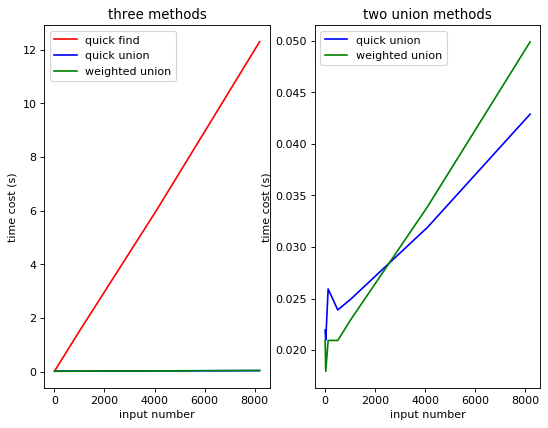

In [10]:
input_number = [8, 32, 128, 512, 1024, 4096, 8192]
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(1,2,1)
plt.plot(input_number, runtime_quick_find, 'r' , label = 'quick find')
plt.plot(input_number, runtime_quick_union, 'b', label = 'quick union')
plt.plot(input_number, runtime_weighted_union, 'g', label = 'weighted union')
plt.legend(loc='upper left')
#plt.plot(input_number, runtime_quick_union, 'b', input_number, runtime_weighted_union, 'g')
plt.title('three methods')
plt.xlabel('input number')
plt.ylabel('time cost (s)')

plt.subplot(1,2,2)
#plt.plot(input_number, runtime_quick_find, 'r' , label = 'quick find')
plt.plot(input_number, runtime_quick_union, 'b', label = 'quick union')
plt.plot(input_number, runtime_weighted_union, 'g', label = 'weighted union')
plt.legend(loc='upper left')
#plt.plot(input_number, runtime_quick_union, 'b', input_number, runtime_weighted_union, 'g')
plt.title('two union methods')
plt.xlabel('input number')
plt.ylabel('time cost (s)')
plt.savefig('./plot.jpg')
plt.show()